In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('default')
plt.style.use('dark_background')

In [6]:
trump_followers = pd.read_csv('trump_followers.csv')
obama_followers = pd.read_csv('obama_followers.csv')

all_followers = pd.concat([trump_followers, obama_followers], sort=False)

all_followers

,input.access_token,input.username,input.cursor,users.id,users.id_str,users.name,users.screen_name,users.location,users.description,users.url,...,next_cursor_str,previous_cursor,previous_cursor_str,total_count,users.status.retweeted_status.geo.type,users.status.retweeted_status.geo.coordinates[0],users.status.retweeted_status.coordinates.type,users.status.retweeted_status.coordinates.coordinates[0],users.status.extended_entities.media[0].additional_media_info.call_to_actions.visit_site.url,users.status.retweeted_status.extended_entities.media[0].additional_media_info.call_to_actions.visit_site.url
0,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,realdonaldtrump,NaN,1187715524035301378,1187715524035301378,Elvis Mutimura,ElvisMutimura,"London, England",NaN,NaN,...,1648379270245794258,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,realdonaldtrump,NaN,1187739330053365762,1187739330053365762,Ahmad Khan,AhmadKh74177417,"Islamabad, Pakistan",Enjoy Your Life ❣️😘,NaN,...,1648379270245794258,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,realdonaldtrump,NaN,342698854,342698854,børge sellevoll,tcmborge,NaN,NaN,NaN,...,1648379270245794258,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,realdonaldtrump,NaN,1187750344396361729,1187750344396361729,Elizabeth,Elizabe40981740,NaN,hahaha,NaN,...,1648379270245794258,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,realdonaldtrump,NaN,1880169416,1880169416,Renee Edwards,HeyHeyItsRenee,NaN,NaN,NaN,...,1648379270245794258,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,barackobama,1.648372e+18,1118095735948374016,1118095735948374016,Kuzuya,kuzuya5735,白川郷がある県,フォロバは気分。スプラ2/ポケモン/テトリス/サーモンラン \nフレコはDMで 上記4つ好き,https://t.co/7k8yQJwTHF,...,1648371181320396615,-1648371580938912380,-1648371580938912380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5996,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,barackobama,1.648372e+18,1051165091213717504,1051165091213717504,Kalaiarasi,Kalaiar83122732,NaN,NaN,NaN,...,1648371181320396615,-1648371580938912380,-1648371580938912380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,barackobama,1.648372e+18,1187717003068497920,1187717003068497920,Laura camila diaz sanchez,Lauraca28735199,NaN,"Soy muy alegre, llena de vida y armonia , me g...",NaN,...,1648371181320396615,-1648371580938912380,-1648371580938912380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5998,AAAAAAAAAAAAAAAAAAAAAG1f9QAAAAAAMFrrb7Yts3ebB3...,barackobama,1.648372e+18,1175927342457184256,1175927342457184256,Liz Wiegardt,LizWiegardt,NaN,NaN,NaN,...,1648371181320396615,-1648371580938912380,-1648371580938912380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
all_followers['has_zero_followers'] = all_followers['users.followers_count'] == 0

Text(0.5, 0, '')

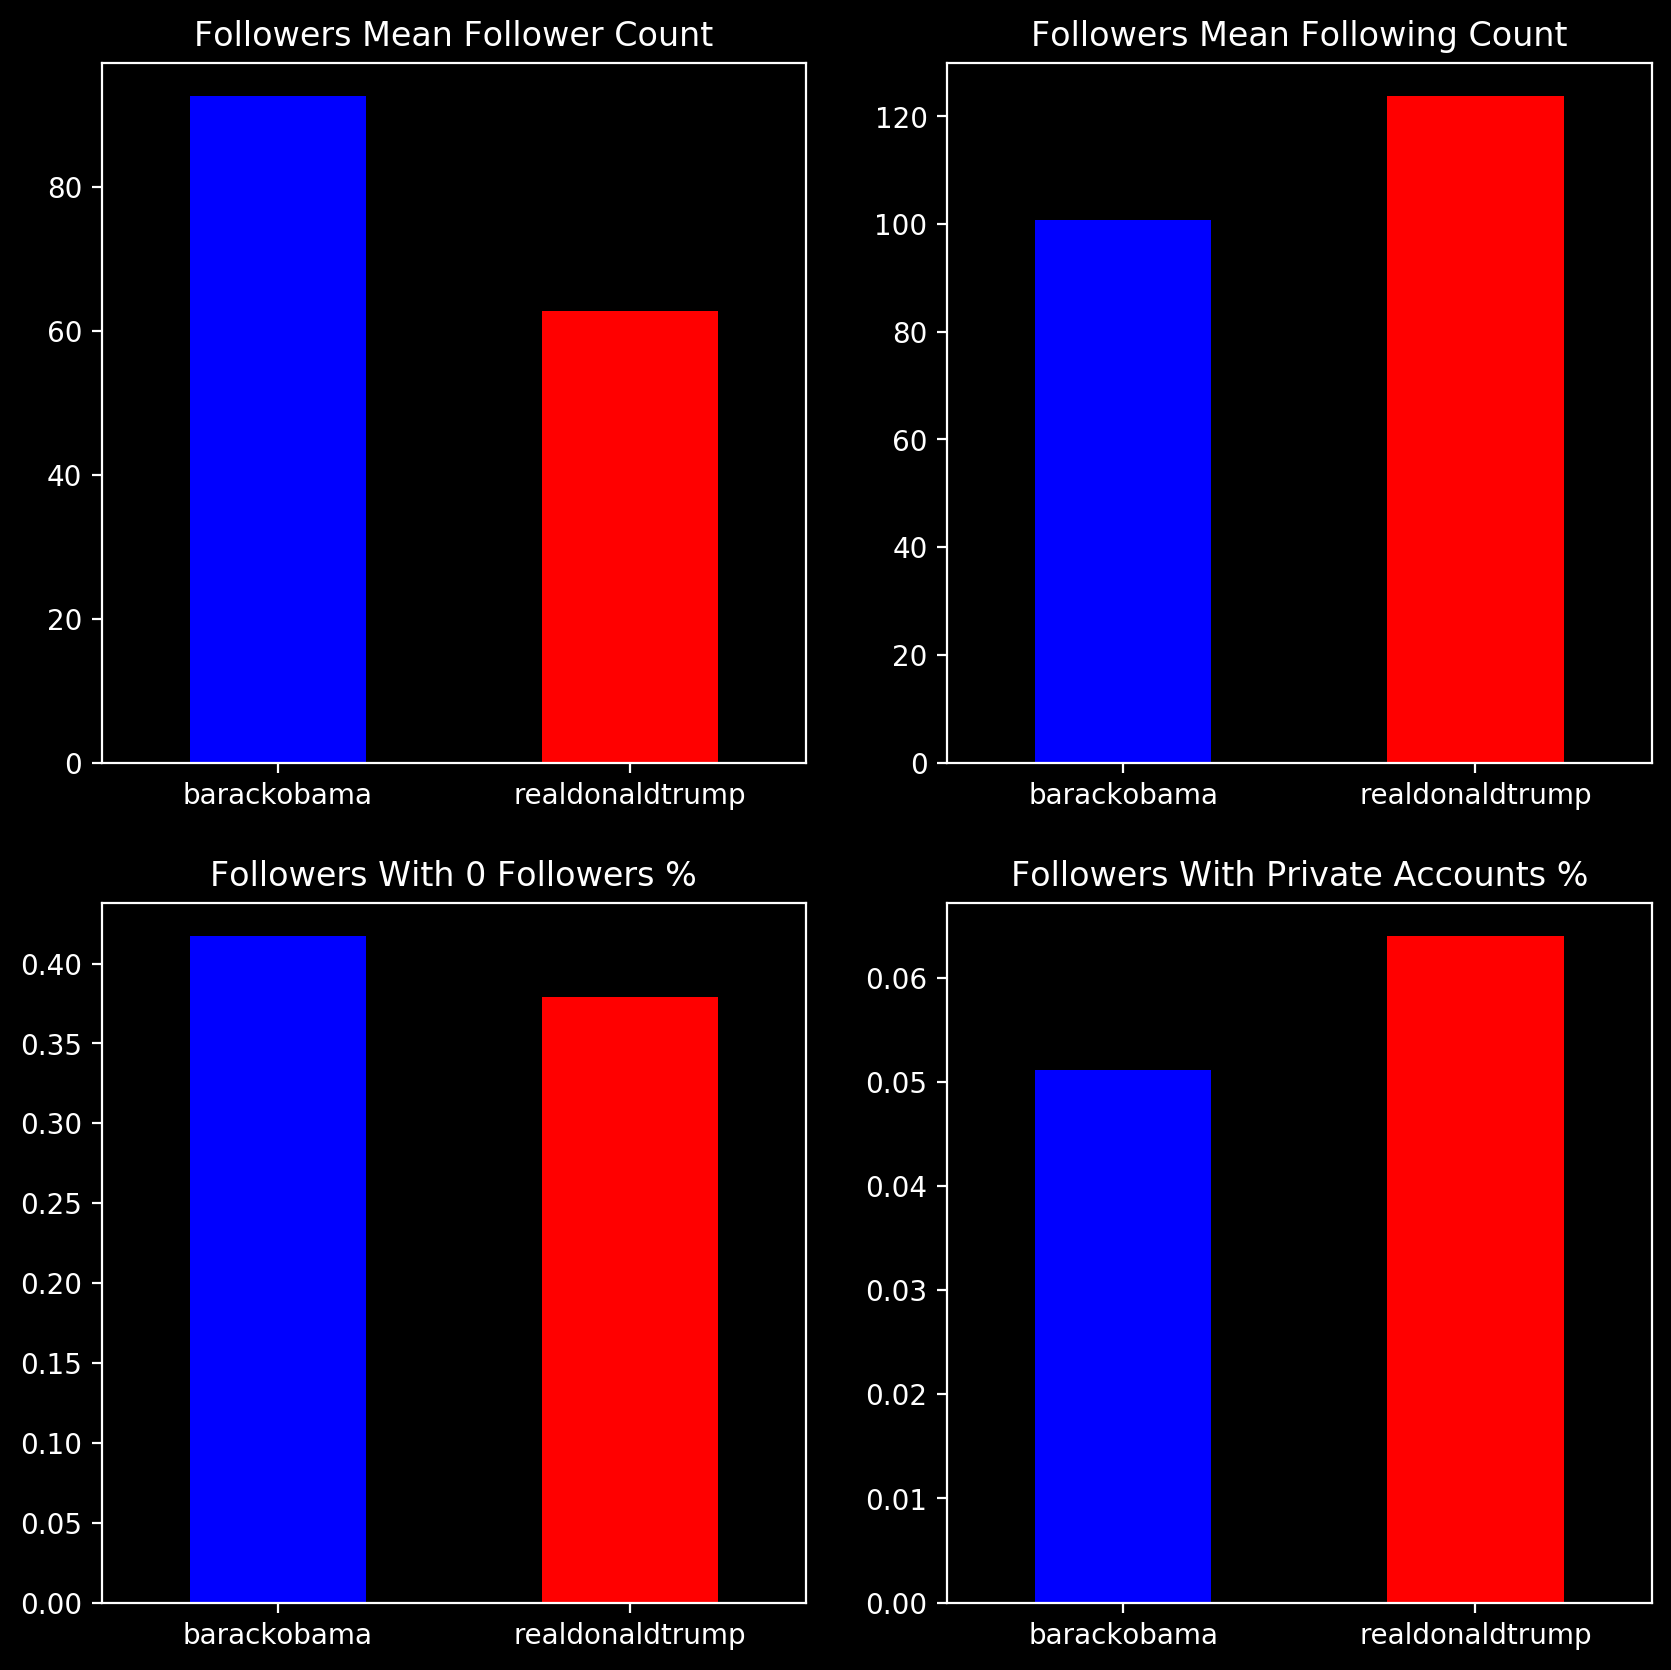

In [93]:
fig = plt.figure(tight_layout=False, figsize=(10, 10), dpi=200)
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

all_followers \
    .groupby('input.username')['users.followers_count'] \
    .mean() \
    .plot(ax=ax1, kind='bar', title='Followers Mean Follower Count', rot=0, color=['blue', 'red']) \
    .set_xlabel('')

all_followers \
    .groupby('input.username')['users.friends_count'] \
    .mean() \
    .plot(ax=ax2, kind='bar', title='Followers Mean Following Count', rot=0, color=['blue', 'red']) \
    .set_xlabel('')

all_followers \
    .groupby('input.username')['has_zero_followers'] \
    .mean() \
    .plot(ax=ax3, kind='bar', title='Followers With 0 Followers %', rot=0, color=['blue', 'red']) \
    .set_xlabel('')

all_followers \
    .groupby('input.username')['users.protected'] \
    .mean() \
    .plot(ax=ax4, kind='bar', title='Followers With Private Accounts %', rot=0, color=['blue', 'red']) \
    .set_xlabel('')

